**Data Collection**

ChEMBL is a meticulously maintained repository of bioactive compounds possessing drug-like characteristics, amalgamating chemical, bioactivity, and genomic information to facilitate the transformation of genomic data into innovative and efficient pharmaceuticals.

In [208]:
! pip install chembl_webresource_client

In [389]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.3 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.3 MB 9.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.3 MB 13.6 MB/s 

In [696]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

**Searching for Target Protein**

We will be initially focusing on Glycine as the drug target
for Multiple Sclerosis. The model allows you to predict the bioactivity towards
inhibiting this transmitter.

In [697]:
target = new_client.target
target_query = target.search('Glycine')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Glycine receptor (alpha-1/beta),16.0,False,CHEMBL2363052,"[{'accession': 'P23415', 'component_descriptio...",PROTEIN COMPLEX,9606
1,[],Rattus norvegicus,Glycine receptor,16.0,False,CHEMBL3392921,"[{'accession': 'P22771', 'component_descriptio...",PROTEIN COMPLEX GROUP,10116
2,"[{'xref_id': 'P07727', 'xref_name': None, 'xre...",Rattus norvegicus,Glycine receptor subunit alpha-1,15.0,False,CHEMBL3246,"[{'accession': 'P07727', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'P22771', 'xref_name': None, 'xre...",Rattus norvegicus,Glycine receptor subunit alpha-2,15.0,False,CHEMBL2328,"[{'accession': 'P22771', 'component_descriptio...",SINGLE PROTEIN,10116
4,"[{'xref_id': 'P23415', 'xref_name': None, 'xre...",Homo sapiens,Glycine receptor subunit alpha-1,15.0,False,CHEMBL5845,"[{'accession': 'P23415', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
66,[],Homo sapiens,Thymidylate synthase/GAR transformylase/AICAR ...,4.0,False,CHEMBL3885528,"[{'accession': 'P04818', 'component_descriptio...",PROTEIN FAMILY,9606
67,[],Mus musculus,"Glutamate receptor ionotropic, NMDA 1/NMDA 2B",4.0,False,CHEMBL3885583,"[{'accession': 'P35438', 'component_descriptio...",PROTEIN COMPLEX,10090
68,[],Rattus norvegicus,Ionotropic glutamate receptor NMDA1/2B,4.0,False,CHEMBL4106155,"[{'accession': 'P35439', 'component_descriptio...",PROTEIN COMPLEX,10116
69,[],Rattus norvegicus,Ionotropic glutamate receptor NMDA1/2A/2B,4.0,False,CHEMBL4106156,"[{'accession': 'P35439', 'component_descriptio...",PROTEIN COMPLEX,10116


Selecting and retrieving the bioactivity data from Human Glycine (first entry in the above table)

In [698]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2363052'

Filter by drugs which target Human Glycine and has IC50 values

In [699]:
#Here, we will retrieve only bioactivity data for Human Glycine that are reported as pChEMBL values.

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,17980381,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.03
1,None,None,17980382,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.56
2,None,None,17980383,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.67
3,None,None,17980384,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.74
4,None,None,17980385,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201112,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4820882,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,5.41
107,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201126,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.06
108,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201127,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.3
109,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201128,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.9


In [700]:
df.to_csv('Glycine_01_bioactivity_data_raw.csv', index=False)

**Handling Missing Data**

Remove any compounds with missing values in the standard_value and canonical_smiles columns.

In [701]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

C:\Users\Rahma\AppData\Local\Temp\ipykernel_4372\3852201246.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,17980381,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.03
1,None,None,17980382,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.56
2,None,None,17980383,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.67
3,None,None,17980384,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.74
4,None,None,17980385,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201112,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4820882,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,5.41
107,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201126,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.06
108,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201127,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.3
109,"{'action_type': 'ANTAGONIST', 'description': '...",None,23201128,[],CHEMBL4820884,Antagonist activity at human glycine receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.9


In [702]:

len(df2.canonical_smiles.unique())

46

In [703]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,17980381,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.03
1,None,None,17980382,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.56
2,None,None,17980383,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.67
3,None,None,17980384,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,pIC50,None,UO_0000065,None,6.74
4,None,None,17980385,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,1.5
5,None,None,17980386,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.67
6,None,None,17980387,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.24
7,None,None,17980388,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.15
8,None,None,17980389,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.78
9,None,None,17980390,[],CHEMBL3998488,Antagonist activity at recombinant human glyci...,B,None,None,BAO_0000190,...,Homo sapiens,Glycine receptor (alpha-1/beta),9606,None,None,IC50,uM,UO_0000065,None,0.71


**Data Preprocessing**

Create a DataFrame by merging the three columns (molecule_chembl_id, canonical_smiles, standard_value) with the bioactivity_class.

In [704]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4096857,CCC(=O)Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(...,933.25
1,CHEMBL4060962,Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N2[C...,275.42
2,CHEMBL4089150,O=C1/C(=N/O)[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1...,213.8
3,CHEMBL227934,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,181.97
4,CHEMBL4061219,COC(=O)CCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC...,1500.0
5,CHEMBL4096505,COC(=O)CO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=C...,670.0
6,CHEMBL4103909,C#CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,240.0
7,CHEMBL4079657,C=CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,150.0
8,CHEMBL4066164,O=C1/C(=N/OCCc2ccccc2)[C@@H]2OCC=C3CN4CC[C@]56...,780.0
9,CHEMBL4087535,CCCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[...,710.0


In [705]:
df3.to_csv('Glycine_02_bioactivity_data_preprocessed.csv', index=False)

**Data Classification**


In this step, we categorize compounds as active, inactive, or intermediate.

The bioactivity data is measured in the IC50 unit. Compounds with values less than 1000 nM are classified as active, while those exceeding 10,000 nM are labeled as inactive. Values falling between 1,000 and 10,000 nM are classified as intermediate.

In [706]:
df4 = pd.read_csv('Glycine_02_bioactivity_data_preprocessed.csv')

In [707]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [708]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4096857,CCC(=O)Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(...,933.25,active
1,CHEMBL4060962,Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N2[C...,275.42,active
2,CHEMBL4089150,O=C1/C(=N/O)[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1...,213.80,active
3,CHEMBL227934,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,181.97,active
4,CHEMBL4061219,COC(=O)CCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC...,1500.00,intermediate
5,CHEMBL4096505,COC(=O)CO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=C...,670.00,active
6,CHEMBL4103909,C#CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,240.00,active
7,CHEMBL4079657,C=CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,150.00,active
8,CHEMBL4066164,O=C1/C(=N/OCCc2ccccc2)[C@@H]2OCC=C3CN4CC[C@]56...,780.00,active
9,CHEMBL4087535,CCCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[...,710.00,active


In [709]:
df5.to_csv('Glycine_03_bioactivity_data_curated.csv', index=False)

In [711]:
! zip Glycine.zip *.csv

updating: Glycine_01_bioactivity_data_raw.csv (deflated 95%)
updating: Glycine_02_bioactivity_data_preprocessed.csv (deflated 88%)
updating: Glycine_03_bioactivity_data_curated.csv (deflated 88%)
  adding: GABA_01_bioactivity_data_raw.csv (deflated 86%)
  adding: GABA_02_bioactivity_data_preprocessed.csv (deflated 85%)
  adding: GABA_03_bioactivity_data_curated.csv (deflated 85%)
  adding: GABA_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: GABA_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: GABA_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 94%)
  adding: Glycine_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
  adding: Glycine_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: Glycine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 94%)
  adding: descriptors_output.csv (deflated 94%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (defl

In [622]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [623]:
!python -m wget

usage: wget.py [options] URL

options:
  -o --output FILE|DIR   output filename or directory
  -h --help
  --version



In [624]:
import wget

In [625]:
! python -m wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


Saved under Miniconda3-py37_4.8.2-Linux-x86_64.sh


ERROR: File or directory already exists: '/home/Rahma/miniconda3'
If you want to update an existing installation, use the -u option.


^C


**SECTION 2 - Exploring Data**

In [626]:
pip install rdkit

^C
Note: you may need to restart the kernel to use updated packages.


**RdKit Package**

Allows us to compute the molecular descriptors for the compounds in the dataset.
The smiles notation in the dataset contains the information about the chemical structure of the molecule. This is been used to compute the molecular descriptors.



In [712]:
import pandas as pd
df = pd.read_csv('Glycine_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4096857,CCC(=O)Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(...,933.25,active
1,CHEMBL4060962,Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N2[C...,275.42,active
2,CHEMBL4089150,O=C1/C(=N/O)[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1...,213.80,active
3,CHEMBL227934,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,181.97,active
4,CHEMBL4061219,COC(=O)CCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC...,1500.00,intermediate
5,CHEMBL4096505,COC(=O)CO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=C...,670.00,active
6,CHEMBL4103909,C#CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,240.00,active
7,CHEMBL4079657,C=CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,150.00,active
8,CHEMBL4066164,O=C1/C(=N/OCCc2ccccc2)[C@@H]2OCC=C3CN4CC[C@]56...,780.00,active
9,CHEMBL4087535,CCCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[...,710.00,active


In [713]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [714]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')


In [715]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4096857,933.25,active,CCC(=O)Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(...
1,CHEMBL4060962,275.42,active,Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N2[C...
2,CHEMBL4089150,213.80,active,O=C1/C(=N/O)[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1...
3,CHEMBL227934,181.97,active,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...
4,CHEMBL4061219,1500.00,intermediate,COC(=O)CCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC...
5,CHEMBL4096505,670.00,active,COC(=O)CO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=C...
6,CHEMBL4103909,240.00,active,C#CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...
7,CHEMBL4079657,150.00,active,C=CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...
8,CHEMBL4066164,780.00,active,O=C1/C(=N/OCCc2ccccc2)[C@@H]2OCC=C3CN4CC[C@]56...
9,CHEMBL4087535,710.00,active,CCCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[...


**Lipinski Rule of 5 Descriptors**

Lipinski's Rule of Five Descriptors is a collection of practical guidelines employed to assess the suitability of compounds for drug development. These guidelines are rooted in the Absorption, Distribution, Metabolism, and Excretion (ADME), also known as the pharmacokinetic profile. Dr. Lipinski conducted an analysis of all orally active FDA-approved medications, giving rise to what is now known as Lipinski's Rule or the Rule of Five. These guidelines are characterized by multiples of five and include the following criteria:

Molecular weight should be less than 500 Dalt ns.
The octanol-water partition coefficient (LogP) should be less th n 5.
Hydrogen bond donors should be fewer t an 5.
Hydrogen bond acceptors should be fewer t10.





In [716]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [717]:
# Calculating descriptors.
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [718]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,405.498,2.4410,1.0,4.0
1,349.434,1.6747,1.0,4.0
2,363.417,1.5326,1.0,5.0
3,334.419,2.0925,0.0,3.0
4,477.561,2.4183,0.0,7.0
5,435.480,1.2480,0.0,7.0
6,401.466,1.7082,0.0,5.0
7,403.482,2.2610,0.0,5.0
8,467.569,3.3177,0.0,5.0
9,433.552,3.2652,0.0,5.0


In [719]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4096857,CCC(=O)Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(...,933.25,active,405.498,2.4410,1.0,4.0
1,CHEMBL4060962,Nc1ccc2c(c1)[C@@]13CCN4CC5=CCO[C@H]6CC(=O)N2[C...,275.42,active,349.434,1.6747,1.0,4.0
2,CHEMBL4089150,O=C1/C(=N/O)[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1...,213.80,active,363.417,1.5326,1.0,5.0
3,CHEMBL227934,O=C1C[C@@H]2OCC=C3CN4CC[C@]56c7ccccc7N1[C@H]5[...,181.97,active,334.419,2.0925,0.0,3.0
4,CHEMBL4061219,COC(=O)CCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC...,1500.00,intermediate,477.561,2.4183,0.0,7.0
5,CHEMBL4096505,COC(=O)CO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=C...,670.00,active,435.480,1.2480,0.0,7.0
6,CHEMBL4103909,C#CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,240.00,active,401.466,1.7082,0.0,5.0
7,CHEMBL4079657,C=CCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[C...,150.00,active,403.482,2.2610,0.0,5.0
8,CHEMBL4066164,O=C1/C(=N/OCCc2ccccc2)[C@@H]2OCC=C3CN4CC[C@]56...,780.00,active,467.569,3.3177,0.0,5.0
9,CHEMBL4087535,CCCCCO/N=C1/C(=O)N2c3ccccc3[C@@]34CCN5CC6=CCO[...,710.00,active,433.552,3.2652,0.0,5.0


In [720]:
IC_50_values = df_combined.iloc[:,2].values
print(IC_50_values[0:7])
print(type(IC_50_values))

[ 933.25  275.42  213.8   181.97 1500.    670.    240.  ]
<class 'numpy.ndarray'>


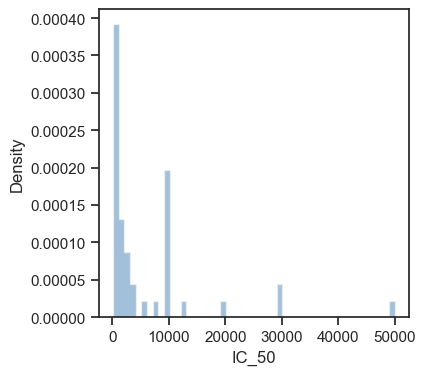

In [721]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4, 4))
plt.hist(IC_50_values, bins=50, density=True, histtype='stepfilled', color='steelblue', alpha=0.5)
# plt.plot(IC_50_values)
plt.xlabel('IC_50')
plt.ylabel('Density')
plt.show()


**Transformation of IC50 to pIC50**
In order to achieve a more uniform distribution of IC50 data, we will convert IC50 to the negative logarithmic scale, which is represented as -log10(IC50).

The custom function, pIC50(), is designed to take a DataFrame as input and perform the following operations:

Extract the IC50 values from the standard_value column and convert them from nanomolar (nM) to molar (M) by multiplying each value by
 10.
Convert the molar value to its corresponding -log10 v
alue.
Remove the standard_value column and generate a new column named pIC50. values.


In [722]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50_numpy(input):
    pIC50 = []

    for i in range(len(input)):
        molar = input[i]*(10**-9) + 1e-12 # Converts nM to M
        pIC50.append(-np.log10(molar))

    return pIC50

6.823905845657424


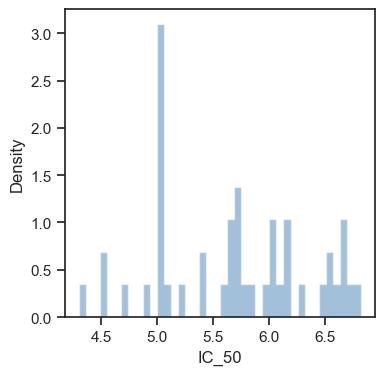

In [723]:
PIC_50_values = pIC50_numpy(IC_50_values)
print(max(PIC_50_values))
plt.figure(figsize=(4, 4))
plt.hist(PIC_50_values, bins=40, density=True, histtype='stepfilled', color='steelblue', alpha=0.5)
# plt.plot(PIC_50_values)
plt.xlabel('IC_50')
plt.ylabel('Density')
plt.show()


In [724]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) + 1e-12# Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [725]:
#Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
df_combined.standard_value.describe()

count       46.000000
mean      6159.449348
std       9651.346390
min        150.000000
25%        687.500000
50%       1950.000000
75%      10000.000000
max      50000.000000
Name: standard_value, dtype: float64

In [726]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis= 1)

    return x

In [644]:

df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL96,NCCCC(=O)O,active,103.121,-0.19010,2.0,2.0,25.0
1,CHEMBL111920,CC(CN)C[PH](=O)O,active,137.119,0.04820,2.0,2.0,780.0
2,CHEMBL113217,NC/C=C/[PH](=O)O,active,121.076,-0.07420,2.0,2.0,280.0
3,CHEMBL113396,CC(CCN)P(C)(=O)O,active,151.146,0.62390,2.0,2.0,166.0
4,CHEMBL325921,CCP(=O)(O)CCCN,intermediate,151.146,0.62550,2.0,2.0,1350.0
5,CHEMBL301742,NC[C@H](CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,15.0
6,CHEMBL112203,NCCC[PH](=O)O,active,123.092,-0.19780,2.0,2.0,2.4
7,CHEMBL701,NCC(CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,35.0
8,CHEMBL302213,NC[C@@H](CC(=O)O)c1ccc(Cl)cc1,intermediate,213.664,1.85700,2.0,2.0,1770.0
9,CHEMBL430501,NCC(C[PH](=O)O)c1ccc(Cl)cc1,active,233.635,1.84930,2.0,2.0,39.0


In [727]:
df_norm.standard_value_norm.describe()

count        36.000000
mean       8730.538889
std       23227.713690
min           0.200000
25%          18.450000
50%         223.000000
75%        1087.500000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [728]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL96,NCCCC(=O)O,active,103.121,-0.19010,2.0,2.0,7.602043
1,CHEMBL111920,CC(CN)C[PH](=O)O,active,137.119,0.04820,2.0,2.0,6.107905
2,CHEMBL113217,NC/C=C/[PH](=O)O,active,121.076,-0.07420,2.0,2.0,6.552840
3,CHEMBL113396,CC(CCN)P(C)(=O)O,active,151.146,0.62390,2.0,2.0,6.779889
4,CHEMBL325921,CCP(=O)(O)CCCN,intermediate,151.146,0.62550,2.0,2.0,5.869666
5,CHEMBL301742,NC[C@H](CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.823880
6,CHEMBL112203,NCCC[PH](=O)O,active,123.092,-0.19780,2.0,2.0,8.619608
7,CHEMBL701,NCC(CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.455920
8,CHEMBL302213,NC[C@@H](CC(=O)O)c1ccc(Cl)cc1,intermediate,213.664,1.85700,2.0,2.0,5.752026
9,CHEMBL430501,NCC(C[PH](=O)O)c1ccc(Cl)cc1,active,233.635,1.84930,2.0,2.0,7.408924


In [647]:
df_final.pIC50.describe()

count    36.000000
mean      6.735907
std       1.458787
min       4.000000
25%       5.967416
50%       6.666365
75%       7.734024
max       9.696804
Name: pIC50, dtype: float64

In [729]:
df_final.to_csv('Glycine_04_bioactivity_data_3class_pIC50.csv')

In [730]:
#Removing the 'intermediate' bioactivity class


df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL96,NCCCC(=O)O,active,103.121,-0.19010,2.0,2.0,7.602043
1,CHEMBL111920,CC(CN)C[PH](=O)O,active,137.119,0.04820,2.0,2.0,6.107905
2,CHEMBL113217,NC/C=C/[PH](=O)O,active,121.076,-0.07420,2.0,2.0,6.552840
3,CHEMBL113396,CC(CCN)P(C)(=O)O,active,151.146,0.62390,2.0,2.0,6.779889
5,CHEMBL301742,NC[C@H](CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.823880
6,CHEMBL112203,NCCC[PH](=O)O,active,123.092,-0.19780,2.0,2.0,8.619608
7,CHEMBL701,NCC(CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.455920
9,CHEMBL430501,NCC(C[PH](=O)O)c1ccc(Cl)cc1,active,233.635,1.84930,2.0,2.0,7.408924
10,CHEMBL113453,NCC(O)C[PH](=O)O,active,139.091,-1.22700,3.0,3.0,7.744703
11,CHEMBL112960,C[C@@H](N)C(O)C[PH](=O)O,inactive,153.118,-0.83850,3.0,3.0,4.892790


In [731]:
df_2class.to_csv('Glycine_05_bioactivity_data_2class_pIC50.csv')

In [732]:
# Frequency plot of the 2 bioactivity classes
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

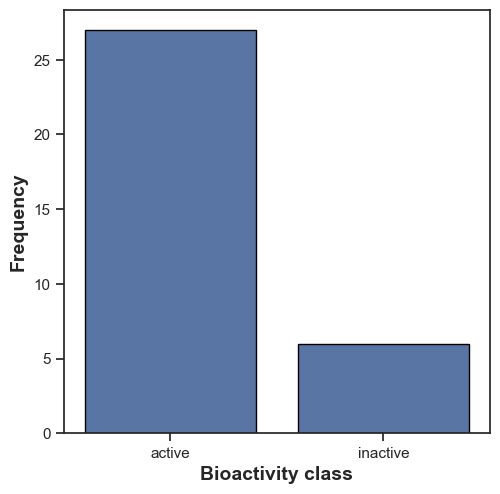

In [733]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot of MW versus LogP**

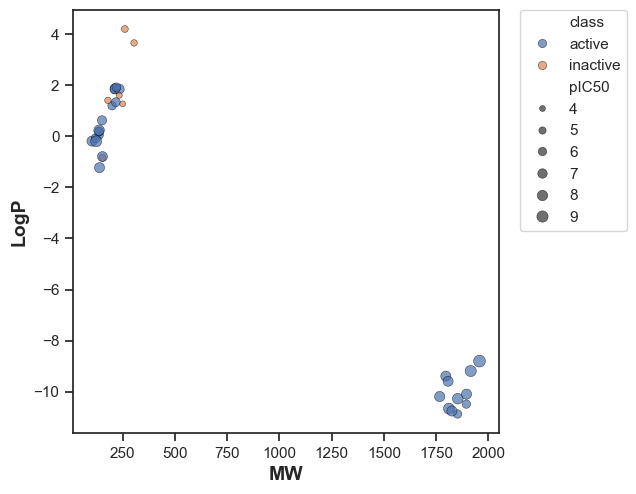

In [734]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


**pIC50 value**

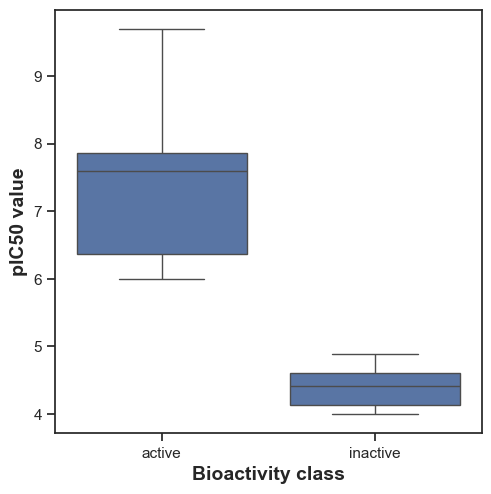

In [735]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test is a nonparametric statistical test used to assess the significance of differences between two independent samples, determining whether they were extracted from populations with identical distributions.

By default, the test assumes there is no discrepancy between the distribution of the two samples. Rejecting this null hypothesis implies that there is a notable difference between the samples. In particular, the test assesses if a randomly selected observation from one sample is equally likely to be greater or lesser than an observation from the other sample. If this equality assumption is violated, it suggests dissimilar distributions.

Conclude Equality (Fail to Reject H0): Both sample distributions are equivalent.
Conclude Inequality (Reject H0): Sample distributions are not the same.
To achieve meaningful results, the test necessitates a minimum of 20 observations in each sample.

In [736]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [737]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,162.0,0.000171,0.05,Different distribution (reject H0)


**Bioactivity class Vs MW**

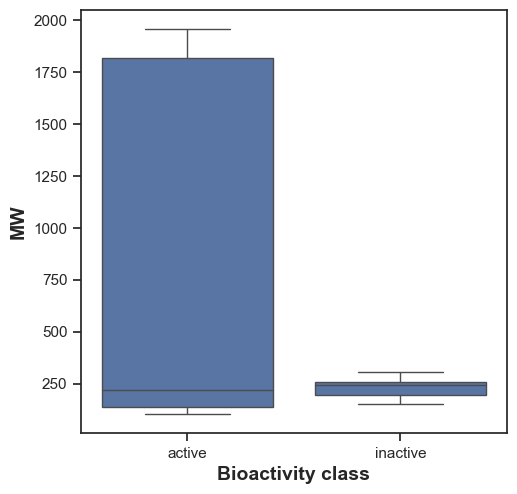

In [738]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [739]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,78.0,0.907021,0.05,Same distribution (fail to reject H0)


**LogP vs MW**

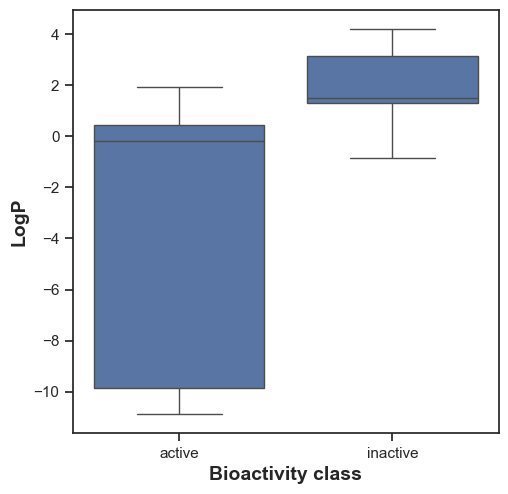

In [740]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [741]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,28.0,0.014258,0.05,Different distribution (reject H0)


**NumHDonors Vs MW**

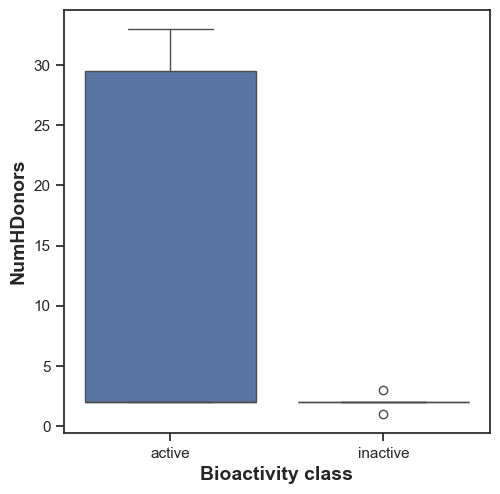

In [742]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [743]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,119.0,0.055243,0.05,Same distribution (fail to reject H0)


**NumHAcceptors Vs MW**

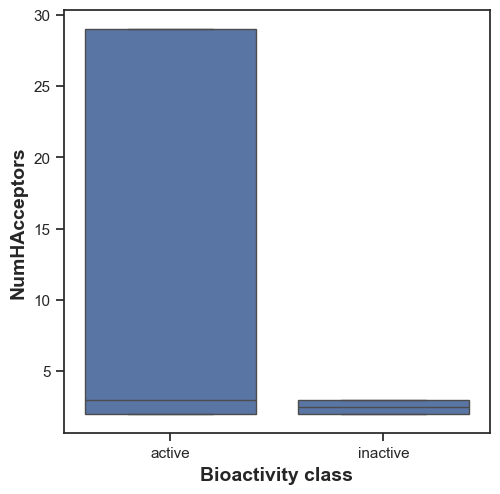

In [744]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [745]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,99.0,0.378548,0.05,Same distribution (fail to reject H0)


**Interpretation of Statistical Results**

**pIC50 values**

When examining the pIC50 values, it's evident that there is a statistically meaningful distinction between the active and inactive compounds. This outcome aligns with expectations, as predefined threshold values (where IC50 < 1,000 nM signifies actives and IC50 > 10,000 nM signifies inactives, equivalent to pIC50 > 6 for actives and pIC50 < 5 for inactives) were utilized to categorize them.

**Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.

**PART 3 - Descriptor Calculator**

**Download PaDEL-Descriptor**

We will perform calculations to generate molecular descriptors, which are essentially numerical representations describing the compounds within the dataset.

In [165]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [746]:
! zip -r results.zip . -i *.csv *.pdf

updating: Glycine_01_bioactivity_data_raw.csv (deflated 95%)
updating: Glycine_02_bioactivity_data_preprocessed.csv (deflated 88%)
updating: Glycine_03_bioactivity_data_curated.csv (deflated 88%)
updating: Glycine_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
updating: Glycine_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 9%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_bioactivity_class.pdf (deflated 41%)
updating: plot_ic50.pdf (deflated 39%)
updating: plot_LogP.pdf (deflated 39%)
updating: plot_MW.pdf (deflated 41%)
updating: plot_MW_vs_LogP.pdf (deflated 26%)
updating: plot_NumHAcceptors.pdf (deflated 40%)
updating: plot_NumHDonors.pdf (deflated 40%)
updating: descriptors_output.csv (deflated 94%)
updating: GABA_01_bioactivity_data_raw.csv (deflated 86%)
updatin

In [605]:
!python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


Saved under padel (1).zip

Saved under padel (2).sh


In [747]:
import pandas as pd

df3 = pd.read_csv('Glycine_05_bioactivity_data_2class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL96,NCCCC(=O)O,active,103.121,-0.19010,2.0,2.0,7.602043
1,1,CHEMBL111920,CC(CN)C[PH](=O)O,active,137.119,0.04820,2.0,2.0,6.107905
2,2,CHEMBL113217,NC/C=C/[PH](=O)O,active,121.076,-0.07420,2.0,2.0,6.552840
3,3,CHEMBL113396,CC(CCN)P(C)(=O)O,active,151.146,0.62390,2.0,2.0,6.779889
4,5,CHEMBL301742,NC[C@H](CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.823880
5,6,CHEMBL112203,NCCC[PH](=O)O,active,123.092,-0.19780,2.0,2.0,8.619608
6,7,CHEMBL701,NCC(CC(=O)O)c1ccc(Cl)cc1,active,213.664,1.85700,2.0,2.0,7.455920
7,9,CHEMBL430501,NCC(C[PH](=O)O)c1ccc(Cl)cc1,active,233.635,1.84930,2.0,2.0,7.408924
8,10,CHEMBL113453,NCC(O)C[PH](=O)O,active,139.091,-1.22700,3.0,3.0,7.744703
9,11,CHEMBL112960,C[C@@H](N)C(O)C[PH](=O)O,inactive,153.118,-0.83850,3.0,3.0,4.892790


In [748]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [749]:
import os

os.environ["JAVA_HOME"] = "C:\Program Files\Java"

In [750]:
os.environ["PATH"] = os.path.join(os.environ["JAVA_HOME"], "bin") + ";" + os.environ["PATH"]


In [751]:
!java -version


java version "21.0.1" 2023-10-17 LTS
Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29)
Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)


In [752]:
!cat molecule.smi | head -5

NCCCC(=O)O	CHEMBL96
CC(CN)C[PH](=O)O	CHEMBL111920
NC/C=C/[PH](=O)O	CHEMBL113217
CC(CCN)P(C)(=O)O	CHEMBL113396
NC[C@H](CC(=O)O)c1ccc(Cl)cc1	CHEMBL301742


**Calculating PaDEL descriptors**

In [753]:
! cat molecule.smi | wc -l

33


In [754]:
!cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [379]:
pip install padelpy

Note: you may need to restart the kernel to use updated packages.


In [755]:
!bash padel.sh

Processing CHEMBL96 in molecule.smi (1/33). 
Processing CHEMBL111920 in molecule.smi (2/33). 
Processing CHEMBL113217 in molecule.smi (3/33). 
Processing CHEMBL113396 in molecule.smi (4/33). 
Processing CHEMBL301742 in molecule.smi (5/33). 
Processing CHEMBL112203 in molecule.smi (6/33). 
Processing CHEMBL701 in molecule.smi (7/33). 
Processing CHEMBL430501 in molecule.smi (8/33). 
Processing CHEMBL111675 in molecule.smi (11/33). 
Processing CHEMBL112960 in molecule.smi (10/33). 
Processing CHEMBL113453 in molecule.smi (9/33). 
Processing CHEMBL113907 in molecule.smi (12/33). 
Processing CHEMBL111378 in molecule.smi (16/33). Average speed: 0.47 s/mol.
Processing CHEMBL113304 in molecule.smi (13/33). Average speed: 1.39 s/mol.
Processing CHEMBL109752 in molecule.smi (15/33). Average speed: 0.71 s/mol.
Processing CHEMBL112710 in molecule.smi (14/33). Average speed: 0.70 s/mol.
Processing CHEMBL3326376 in molecule.smi (20/33). Average speed: 0.24 s/mol.
Processing CHEMBL3326377 in molecul

**Preparing X and Y data matrices**

In [756]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL113217,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL113453,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL112960,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL111920,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL111675,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL113907,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL112203,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL96,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL113396,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL112710,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [678]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [757]:
df3_Y = df3['pIC50']
df3_Y

0     7.602043
1     6.107905
2     6.552840
3     6.779889
4     7.823880
5     8.619608
6     7.455920
7     7.408924
8     7.744703
9     4.892790
10    6.036212
11    6.301029
12    7.537587
13    8.180390
14    6.055517
15    6.443696
16    4.045757
17    4.000000
18    4.420216
19    4.671620
20    4.421361
21    6.214669
22    8.619608
23    8.309715
24    6.000000
25    7.730464
26    6.000000
27    9.696804
28    7.723515
29    7.634493
30    8.920457
31    7.886023
32    7.677760
Name: pIC50, dtype: float64

In [680]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.602043
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.107905
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.552840
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.779889
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823880
5,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.619608
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455920
7,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.408924
8,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744703
9,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.892790


In [758]:
dataset3.to_csv('Glycine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

**PART 4 - Model Building**

In [759]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [760]:
df = pd.read_csv('Glycine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [761]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [762]:
Y = df.pIC50
Y

0     7.602043
1     6.107905
2     6.552840
3     6.779889
4     7.823880
5     8.619608
6     7.455920
7     7.408924
8     7.744703
9     4.892790
10    6.036212
11    6.301029
12    7.537587
13    8.180390
14    6.055517
15    6.443696
16    4.045757
17    4.000000
18    4.420216
19    4.671620
20    4.421361
21    6.214669
22    8.619608
23    8.309715
24    6.000000
25    7.730464
26    6.000000
27    9.696804
28    7.723515
29    7.634493
30    8.920457
31    7.886023
32    7.677760
Name: pIC50, dtype: float64

In [763]:
print(X.shape)
print(Y.shape)


(33, 881)
(33,)


**Removing Low Variance Features**

In [764]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [765]:
X.shape

(33, 212)

In [766]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(26, 212)
(7, 212)


**Building a Regression Model using Random Forest**

In [767]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.34023544327305677